# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from pycaret.regression import *
from sklearn.preprocessing import StandardScaler
import matplotlib
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
font = {'size'   : 25,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]
from sklearn.metrics import r2_score

# Loading Data

In [9]:
paths = glob.glob(os.path.join("E:\Global_Petrophysics_ML\Petrophysics\Sakessar","*.csv"))
paths

['E:\\Global_Petrophysics_ML\\Petrophysics\\Sakessar\\JM_04.csv',
 'E:\\Global_Petrophysics_ML\\Petrophysics\\Sakessar\\Minwal.csv']

In [10]:
data=[]
for j,i in enumerate(paths):
    r = pd.read_csv(i)
    r["well"]=j
    r["GR_max"] = r["GR"].max()
    r["GR_min"] = r["GR"].min()
    zzz=[]
    for k in r["Formation"].unique():
        a = r[(r["Formation"]==k)]
        m = a[(a['VCL']==a['VCL'].max())]['VCL'].values[0]
        if m<0:
            a["Shale Porosity"] = 0
        else:
            a["Shale Porosity"] = m
        zzz.append(a)
    r = pd.concat(zzz)
    data.append(r)

# Testing data

In [11]:
training = data[1]
FFF = training.copy()
testing = data[0]

# Standardization

In [12]:
scaler = StandardScaler()
scaler.fit(training[["GR","VCL"]])
training[["GR","VCL"]] = scaler.transform(training[["GR","VCL"]])

array([[<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'VCL'}>]], dtype=object)

<Figure size 1000x1000 with 0 Axes>

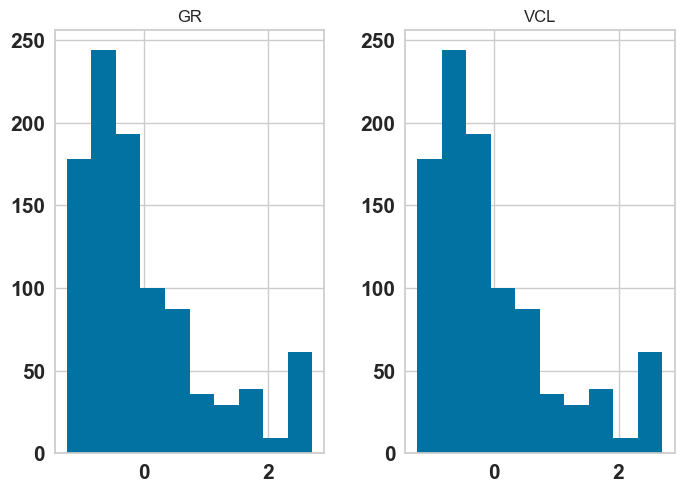

In [13]:
plt.figure(figsize=(10,10))
training[["GR","VCL","Formation"]].hist()

array([[<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'VCL'}>]], dtype=object)

<Figure size 1000x1000 with 0 Axes>

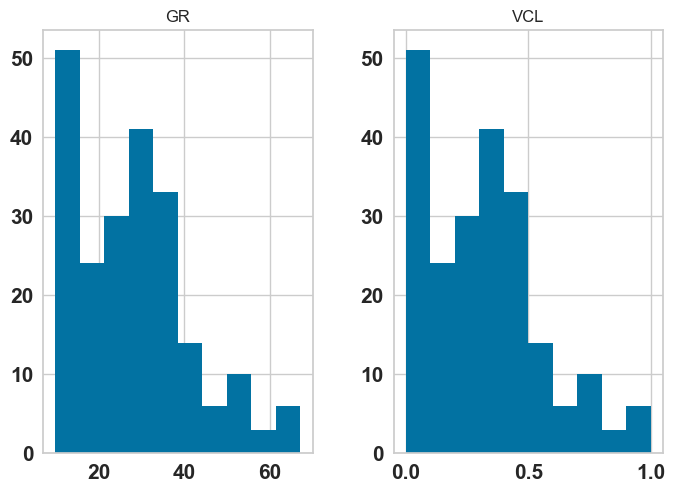

In [14]:
plt.figure(figsize=(10,10))
testing[["GR","VCL","Formation"]].hist()

# Volume of Clay Prediction

In [15]:
features=training[["GR","VCL","Formation"]]


In [16]:
reg = setup(data = features, target = 'VCL',verbose=False,remove_outliers=True)

In [33]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8530
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.5290
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.4360
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.5280
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.4500
et,Extra Trees Regressor,0.0012,0.0000,0.0047,1.0000,0.0017,0.0039,1.5580
ridge,Ridge Regression,0.0016,0.0000,0.0021,1.0000,0.0008,0.0024,1.4180
dt,Decision Tree Regressor,0.0067,0.0007,0.0228,0.9994,0.0073,0.0210,2.3970
rf,Random Forest Regressor,0.0064,0.0007,0.0233,0.9993,0.0073,0.0145,1.5910
gbr,Gradient Boosting Regressor,0.0093,0.0007,0.0238,0.9993,0.0085,0.0354,1.5680


Text(65.72222222222219, 0.5, 'Machine Learning Models')

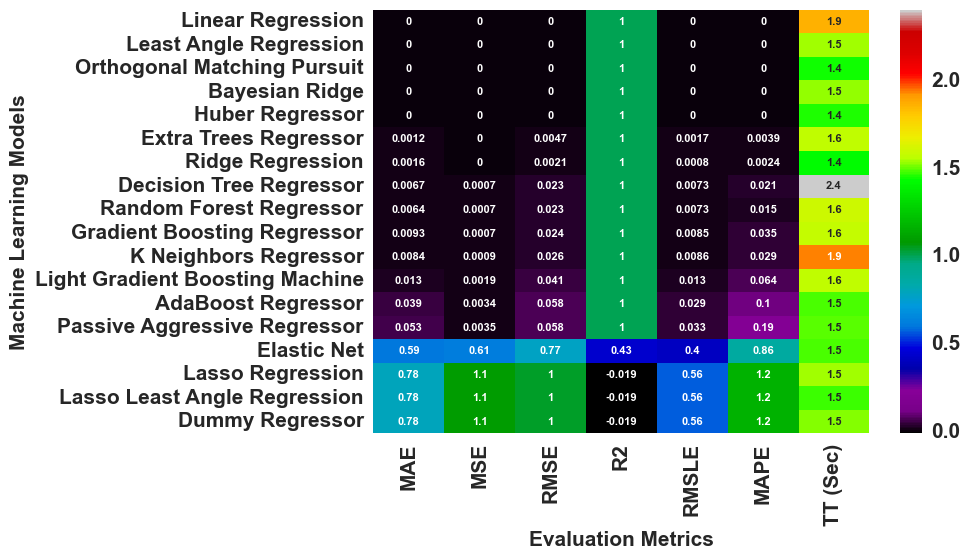

In [34]:
df = pull()
algorithms = df.index
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [35]:
algorithms

Index(['lr', 'lar', 'omp', 'br', 'huber', 'et', 'ridge', 'dt', 'rf', 'gbr',
       'knn', 'lightgbm', 'ada', 'par', 'en', 'lasso', 'llar', 'dummy'],
      dtype='object')

In [40]:
df = df.reset_index()
df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.121
1,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.594
2,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.637
3,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.622
4,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.944
5,Ridge Regression,0.0017,0.0000,0.0023,1.0000,0.0009,0.0025,0.571
6,Extra Trees Regressor,0.0019,0.0001,0.0077,0.9999,0.0026,0.0022,1.249
7,Random Forest Regressor,0.0069,0.0009,0.0262,0.9991,0.0088,0.0109,1.512
8,Decision Tree Regressor,0.0075,0.0009,0.0265,0.9991,0.0090,0.0128,0.979
9,Gradient Boosting Regressor,0.0100,0.0009,0.0273,0.9991,0.0099,0.0318,1.035


In [43]:
def make_functions(num):
    print(num)
    
    functions = []
    
    for i in num:
        
        def func(x):
            
            final_lightgbm = x
            
            final_lightgbm = create_model(c2)
            
            
           
        functions.append(func(i))
        
    return functions

In [46]:
def make_functions(num):
    print(num)
    global functions
    functions = []
    global dataframe
    dataframe = []
    for i in num:
        
        def func(x):
            
            final_lightgbm = x
            
            final_lightgbm = create_model(c2)
            aa = testing.copy()
            aa[["GR","VCL"]] = scaler.transform(testing[["GR","VCL"]])
          
            test = aa
            unseen_predictions = predict_model(final_lightgbm, data=test)
            aa["Predicted Volume of Clay"] = unseen_predictions["prediction_label"]
            dataframe.append(aa)

        functions.append(func(i))
        
    return functions
my_functions = make_functions(list(algorithms))
for f in my_functions:
    print(f)

['lr', 'lar', 'omp', 'br', 'huber', 'et', 'ridge', 'dt', 'rf', 'gbr', 'knn', 'lightgbm', 'ada', 'par', 'en', 'lasso', 'llar', 'dummy']


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:59:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0129,0.0003,0.0166,0.9328,0.0148,1.6006


In [43]:
r2_score(aa["Predicted Volume of Clay"],aa["VCL"])

0.4560667318377388

In [44]:
_1 = aa
_1

,DEPTH,GR,DT,ILD,NPHI,RHOB,Formation,LLD,VCL,Density Porosity,PHIA,Clay Effect,PHIE,SW,well,GR_max,GR_min,Shale Porosity,Predicted Volume of Clay
0,2030.0905,-1.546878,52.7483,38.0677,0.0190,2.7010,Sakessar,38.0677,-1.035345,0.005263,0.005263,0.006841,0.000000,1.000000,0,67.2085,9.833,1.0,-1.546878
1,2030.2155,-1.477251,52.7113,37.8958,0.0190,2.7040,Sakessar,37.8958,-0.959187,0.003509,0.003509,0.009516,0.000000,1.000000,0,67.2085,9.833,1.0,-1.477251
2,2030.3405,-1.412135,53.0225,39.9648,0.0190,2.7035,Sakessar,39.9648,-0.887961,0.003801,0.003801,0.012017,0.000000,1.000000,0,67.2085,9.833,1.0,-1.412135
3,2030.4655,-1.391382,53.1048,43.0137,0.0188,2.6991,Sakessar,43.0137,-0.865261,0.006374,0.006374,0.012814,0.000000,1.000000,0,67.2085,9.833,1.0,-1.391382
4,2030.5905,-1.401724,52.1703,45.9458,0.0180,2.6958,Sakessar,45.9458,-0.876573,0.008304,0.008304,0.012417,0.000000,1.000000,0,67.2085,9.833,1.0,-1.401724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2056.7156,-0.114169,65.9348,6.9826,0.2165,2.4955,Sakessar,6.9826,0.531783,0.125439,0.125439,0.061879,0.063559,0.141600,0,67.2085,9.833,1.0,-0.114169
214,2056.8406,-0.466334,61.2952,7.7734,0.1956,2.5351,Sakessar,7.7734,0.146577,0.102281,0.102281,0.048351,0.053930,0.166883,0,67.2085,9.833,1.0,-0.466334
215,2056.9656,-0.772564,56.9303,9.0277,0.1385,2.5979,Sakessar,9.0277,-0.188384,0.065556,0.065556,0.036587,0.028969,0.310678,0,67.2085,9.833,1.0,-0.772564
216,2057.0906,-0.991246,54.2637,11.4764,0.0876,2.6447,Sakessar,11.4764,-0.427583,0.038187,0.038187,0.028186,0.010001,0.899880,0,67.2085,9.833,1.0,-0.991246


In [45]:
bb = training.copy()
unseen_predictions = predict_model(final_lightgbm, data=training)
bb["Predicted Volume of Clay"] = unseen_predictions["prediction_label"]
bb[["GR","Predicted Volume of Clay"]] = scaler.inverse_transform(bb[["GR","Predicted Volume of Clay"]])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


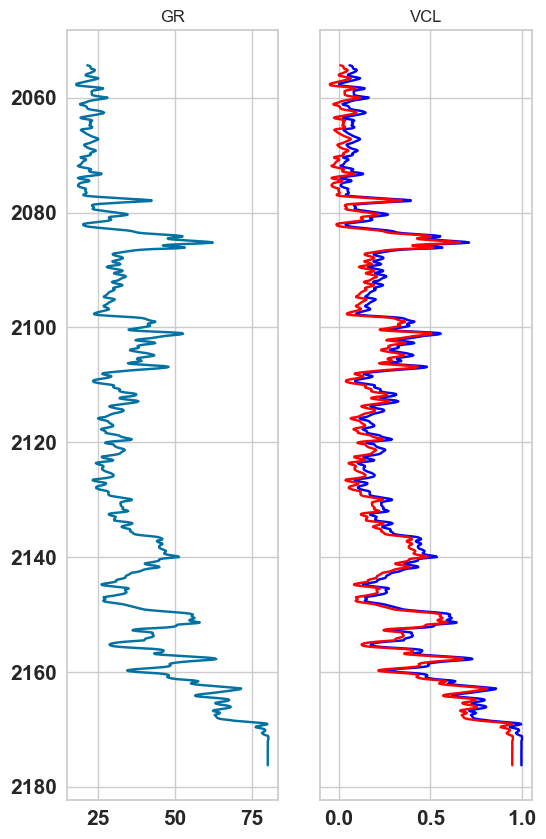

In [116]:
EPTH"],color="blue")
ax[1].plot(bb[["VCL"]]-0.05,bb["DEPTH"],color="fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,10),sharey=True)
ax[0].plot(bb["GR"],bb["DEPTH"])
ax[1].plot(FFF[["VCL"]],bb["Dred")
ax[0].set_title("GR")
ax[1].set_title("VCL")
plt.gca().invert_yaxis()

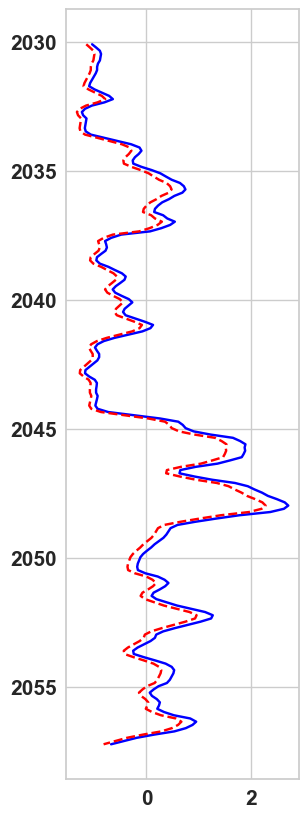

In [52]:

_1 = _1[_1["Formation"]=="Sakessar"].sort_values(by="DEPTH") 
plt.figure(figsize=(3,10))

plt.plot(_1["VCL"],_1["DEPTH"],label="Measured VCL",color="blue")
plt.plot(_1["Predicted Volume of Clay"]+0.4,_1["DEPTH"],label="Predicted VCL",color="red",linestyle="--")
plt.gca().invert_yaxis()
plt.show()

# Effective Porosity Prediction

In [53]:
training[["GR","VCL"]] = scaler.inverse_transform(training[["GR","VCL"]])

In [54]:
features=training[["GR","VCL","RHOB","Formation","PHIA"]]
features

,GR,VCL,RHOB,Formation,PHIA
0,21.3519,0.057675,2.6841,Sakessar,0.015146
1,22.1486,0.070370,2.6865,Sakessar,0.013743
2,22.3980,0.074344,2.6897,Sakessar,0.011871
3,22.4607,0.075343,2.6900,Sakessar,0.011696
4,22.5075,0.076088,2.6862,Sakessar,0.013918
...,...,...,...,...,...
971,80.2940,0.996863,2.6698,Sakessar,0.023509
972,80.2940,0.996863,2.6520,Sakessar,0.033918
973,80.2940,0.996863,2.6415,Sakessar,0.040058
974,80.2940,0.996863,2.6465,Sakessar,0.037135


In [59]:
reg = setup(data = features, target = "PHIA",verbose=False,remove_outliers=True)

In [60]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,3.6500
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.3360
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.3280
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.3470
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.4470
ridge,Ridge Regression,0.0082,0.0003,0.0158,0.9416,0.0123,1.1292,1.3310
gbr,Gradient Boosting Regressor,0.0032,0.0009,0.0203,0.8973,0.0143,0.0533,1.7740
et,Extra Trees Regressor,0.0030,0.0009,0.0205,0.8936,0.0145,0.0112,1.9780
dt,Decision Tree Regressor,0.0034,0.0010,0.0216,0.8849,0.0154,0.0223,1.3960
ada,AdaBoost Regressor,0.0058,0.0009,0.0224,0.8844,0.0162,0.6029,1.7080


Text(65.72222222222219, 0.5, 'Machine Learning Models')

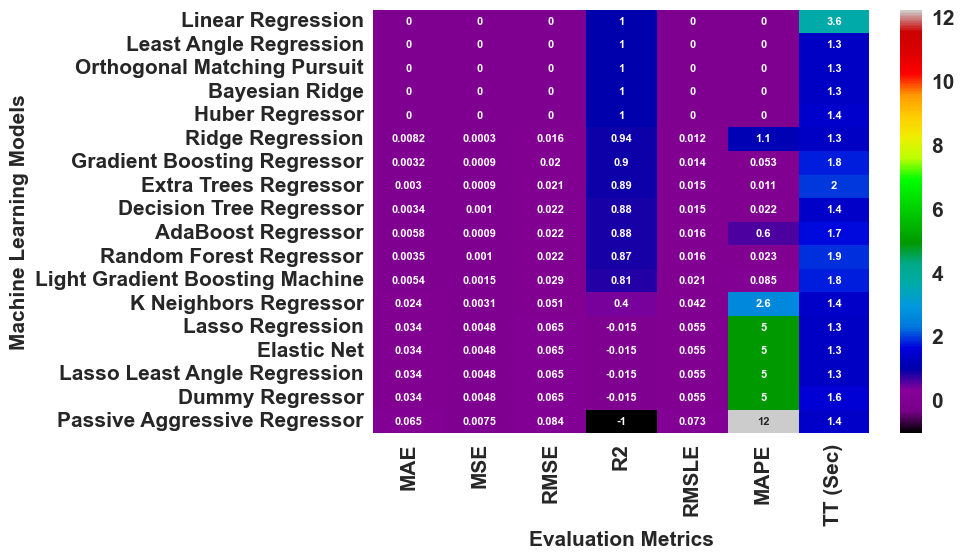

In [61]:
df = pull()
# cmap = ListedColormap(["lightskyblue"]*2)
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [62]:
testing["Measured VCL"] = testing["VCL"].copy()
testing["VCL"] = aa["Predicted Volume of Clay"]

In [64]:
final_lightgbm = finalize_model('lr')
test = testing[["GR","well","VCL","GR_max","GR_min","RHOB","Formation"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Density Porosity Predicted"] = unseen_predictions["prediction_label"]
testing["Density Porosity Predicted"]

0      0.000454
1     -0.000287
2      0.000859
3      0.003583
4      0.005281
         ...   
213    0.133865
214    0.107142
215    0.068127
216    0.039178
217    0.021598
Name: Density Porosity Predicted, Length: 218, dtype: float64

In [65]:
r2_score(testing["Density Porosity Predicted"],testing["PHIA"])

0.9762957105598592

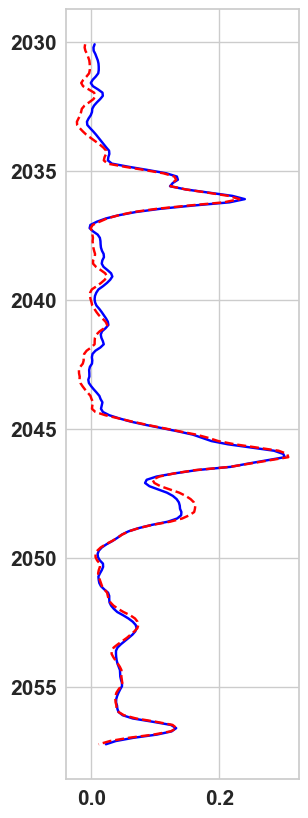

In [66]:
_1 = testing.copy()
_1 = _1[_1["Formation"]=="Sakessar"].sort_values(by="DEPTH") 
plt.figure(figsize=(3,10))

plt.plot(_1["PHIA"],_1["DEPTH"],label="Measured Density Porosity",color="blue")
plt.plot(_1["Density Porosity Predicted"]-0.01,_1["DEPTH"],label="Predicted Density Porosity",color="red",linestyle="--")
plt.gca().invert_yaxis()
plt.show()

In [69]:
bb = training.copy()
unseen_predictions = predict_model(final_lightgbm, data=training)
bb["Density Porosity Predicted"] = unseen_predictions["prediction_label"]
bb

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,DEPT,BS,C1,C2,CALI,DRHO,DT,GR,LLD,LLS,...,DEPTH,VCL,Density Porosity,Clay Effect,SW,well,GR_max,GR_min,Shale Porosity,Density Porosity Predicted
0,2054.3601,8.5,10.7658,10.3231,9.8241,0.0020,53.1402,21.3519,1530.5306,1530.2029,...,2054.3601,0.057675,0.015146,0.004496,0.844242,1,80.4909,17.7323,1.0,0.015146
1,2054.4851,8.5,10.7609,10.3247,9.8257,0.0020,52.9211,22.1486,1309.2728,1317.4973,...,2054.4851,0.070370,0.013743,0.005486,1.000000,1,80.4909,17.7323,1.0,0.013743
2,2054.6101,8.5,10.7160,10.3263,9.8273,0.0013,52.7547,22.3980,1136.4844,1127.5483,...,2054.6101,0.074344,0.011871,0.005795,1.000000,1,80.4909,17.7323,1.0,0.011871
3,2054.7351,8.5,10.6750,10.3280,9.8334,0.0010,52.7354,22.4607,988.7964,973.8954,...,2054.7351,0.075343,0.011696,0.005873,1.000000,1,80.4909,17.7323,1.0,0.011696
4,2054.8601,8.5,10.6559,10.3296,9.8421,0.0007,52.8077,22.5075,879.7823,871.9509,...,2054.8601,0.076088,0.013918,0.005931,1.000000,1,80.4909,17.7323,1.0,0.013918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2175.7351,8.5,8.5444,8.5706,8.6897,0.1247,55.4220,80.2940,38.4640,39.5898,...,2175.7351,0.996863,0.023509,0.077709,1.000000,1,80.4909,17.7323,1.0,0.023509
972,2175.8601,8.5,8.5307,8.5576,8.4866,0.1475,55.4220,80.2940,38.4640,39.7774,...,2175.8601,0.996863,0.033918,0.077709,1.000000,1,80.4909,17.7323,1.0,0.033918
973,2175.9851,8.5,8.4850,8.5150,8.3130,0.1579,55.3868,80.2940,38.4634,39.8870,...,2175.9851,0.996863,0.040058,0.077709,1.000000,1,80.4909,17.7323,1.0,0.040058
974,2176.1101,8.5,8.4211,8.4331,8.2491,0.1661,55.0648,80.2940,38.4576,39.8870,...,2176.1101,0.996863,0.037135,0.077709,1.000000,1,80.4909,17.7323,1.0,0.037134


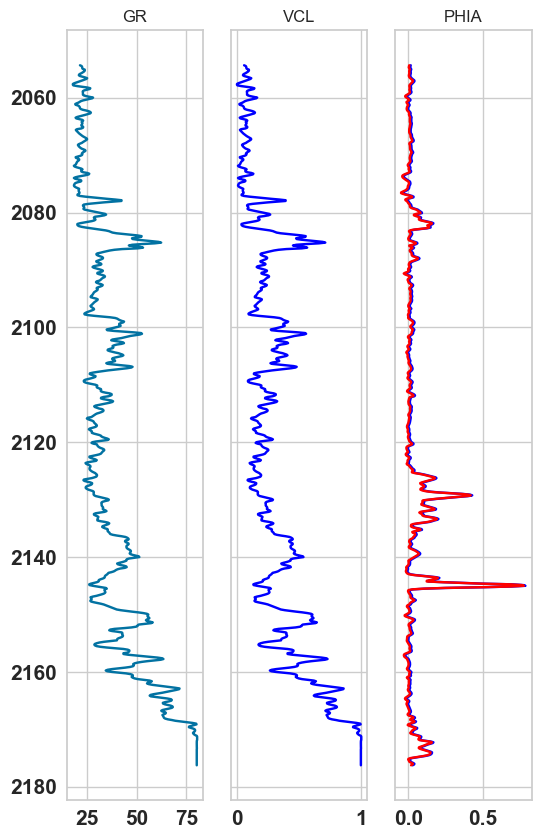

In [72]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(6,10),sharey=True)
ax[0].plot(bb["GR"],bb["DEPTH"])
ax[1].plot(FFF[["VCL"]],bb["DEPTH"],color="blue")



ax[2].plot(FFF[["PHIA"]],bb["DEPTH"],color="blue")
ax[2].plot(bb[["Density Porosity Predicted"]]-0.01,bb["DEPTH"],color="red")

ax[0].set_title("GR")
ax[1].set_title("VCL")
ax[2].set_title("PHIA")
plt.gca().invert_yaxis()

<AxesSubplot:xlabel='PHIA', ylabel='Density Porosity Predicted'>

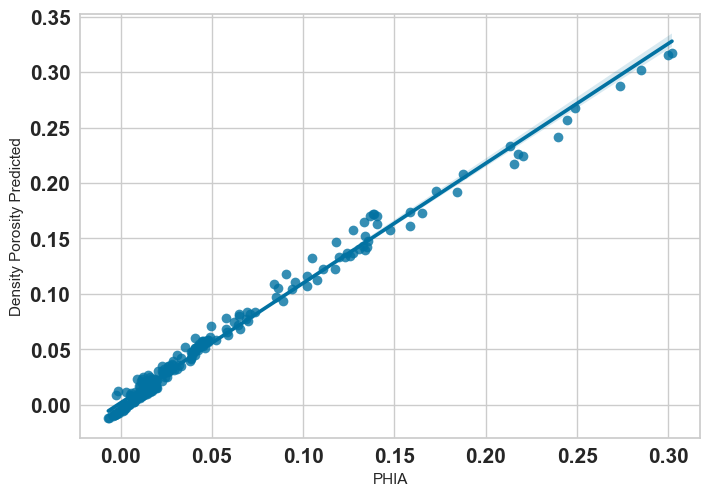

In [73]:
sns.regplot(data =_1,x= "PHIA",y = "Density Porosity Predicted")

# Effective Porosity

In [74]:
features=training[["GR","RHOB","VCL","PHIA","PHIE"]]

In [77]:
reg = setup(data = features, target = "PHIE",verbose=False,remove_outliers=True)

In [80]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0084,0.0002,0.0130,0.9414,0.0118,1.3843,2.0940
lr,Linear Regression,0.0088,0.0002,0.0138,0.9406,0.0120,1.4738,3.5250
br,Bayesian Ridge,0.0088,0.0002,0.0138,0.9406,0.0120,1.4740,1.7990
lar,Least Angle Regression,0.0090,0.0002,0.0145,0.9378,0.0124,1.4741,1.6110
omp,Orthogonal Matching Pursuit,0.0102,0.0003,0.0164,0.9065,0.0146,1.5885,1.6130
ridge,Ridge Regression,0.0114,0.0006,0.0232,0.8737,0.0181,1.6248,1.5960
et,Extra Trees Regressor,0.0057,0.0018,0.0331,0.7690,0.0243,0.1500,2.9950
gbr,Gradient Boosting Regressor,0.0067,0.0018,0.0340,0.7625,0.0252,0.3072,3.5140
rf,Random Forest Regressor,0.0068,0.0019,0.0353,0.7459,0.0264,0.3204,2.6090
dt,Decision Tree Regressor,0.0071,0.0019,0.0354,0.7439,0.0266,0.2891,2.1280


Text(65.72222222222219, 0.5, 'Machine Learning Models')

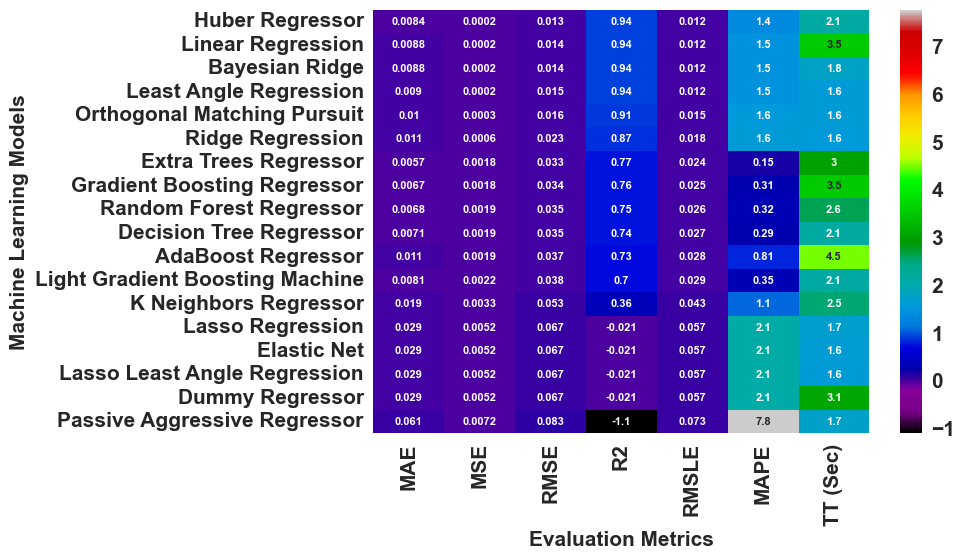

In [81]:
df = pull()
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [82]:
testing["Measured Density Porosity"] = testing["PHIA"].copy()
testing["Density Porosity"] = testing["Density Porosity Predicted"]

In [85]:
unseen_predictions

,GR,RHOB,well,VCL,PHIA,Formation,prediction_label
0,12.675700,2.7010,0,0.017996,0.005263,Sakessar,-0.005707
1,13.787200,2.7040,0,0.014930,0.003509,Sakessar,-0.005586
2,14.826700,2.7035,0,0.013995,0.003801,Sakessar,-0.003935
3,15.158000,2.6991,0,0.016177,0.006374,Sakessar,-0.001436
4,14.992900,2.6958,0,0.018301,0.008304,Sakessar,-0.000126
...,...,...,...,...,...,...,...
213,35.547199,2.4955,0,0.111166,0.125439,Sakessar,0.121103
214,29.925301,2.5351,0,0.094647,0.102281,Sakessar,0.095009
215,25.036699,2.5979,0,0.063694,0.065556,Sakessar,0.059123
216,21.545700,2.6447,0,0.040447,0.038187,Sakessar,0.032588


In [86]:
final_lightgbm = finalize_model(c2)
test = testing[["GR","RHOB","well","VCL","PHIA","Formation"]]

unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Predicted Effective Porosity"] = unseen_predictions["prediction_label"]

In [87]:
bb = training.copy()
unseen_predictions = predict_model(final_lightgbm, data=training)
bb["Predicted Effective Porosity"] = unseen_predictions["prediction_label"]
bb

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.0082,0.0002,0.0129,0.9656,0.0118,1.4387


,DEPT,BS,C1,C2,CALI,DRHO,DT,GR,LLD,LLS,...,DEPTH,VCL,Density Porosity,Clay Effect,SW,well,GR_max,GR_min,Shale Porosity,Predicted Effective Porosity
0,2054.3601,8.5,10.7658,10.3231,9.8241,0.0020,53.1402,21.3519,1530.5306,1530.2029,...,2054.3601,0.057675,0.015146,0.004496,0.844242,1,80.4909,17.7323,1.0,0.009918
1,2054.4851,8.5,10.7609,10.3247,9.8257,0.0020,52.9211,22.1486,1309.2728,1317.4973,...,2054.4851,0.070370,0.013743,0.005486,1.000000,1,80.4909,17.7323,1.0,0.008357
2,2054.6101,8.5,10.7160,10.3263,9.8273,0.0013,52.7547,22.3980,1136.4844,1127.5483,...,2054.6101,0.074344,0.011871,0.005795,1.000000,1,80.4909,17.7323,1.0,0.006584
3,2054.7351,8.5,10.6750,10.3280,9.8334,0.0010,52.7354,22.4607,988.7964,973.8954,...,2054.7351,0.075343,0.011696,0.005873,1.000000,1,80.4909,17.7323,1.0,0.006403
4,2054.8601,8.5,10.6559,10.3296,9.8421,0.0007,52.8077,22.5075,879.7823,871.9509,...,2054.8601,0.076088,0.013918,0.005931,1.000000,1,80.4909,17.7323,1.0,0.008379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2175.7351,8.5,8.5444,8.5706,8.6897,0.1247,55.4220,80.2940,38.4640,39.5898,...,2175.7351,0.996863,0.023509,0.077709,1.000000,1,80.4909,17.7323,1.0,-0.004870
972,2175.8601,8.5,8.5307,8.5576,8.4866,0.1475,55.4220,80.2940,38.4640,39.7774,...,2175.8601,0.996863,0.033918,0.077709,1.000000,1,80.4909,17.7323,1.0,0.004470
973,2175.9851,8.5,8.4850,8.5150,8.3130,0.1579,55.3868,80.2940,38.4634,39.8870,...,2175.9851,0.996863,0.040058,0.077709,1.000000,1,80.4909,17.7323,1.0,0.009980
974,2176.1101,8.5,8.4211,8.4331,8.2491,0.1661,55.0648,80.2940,38.4576,39.8870,...,2176.1101,0.996863,0.037135,0.077709,1.000000,1,80.4909,17.7323,1.0,0.007356


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


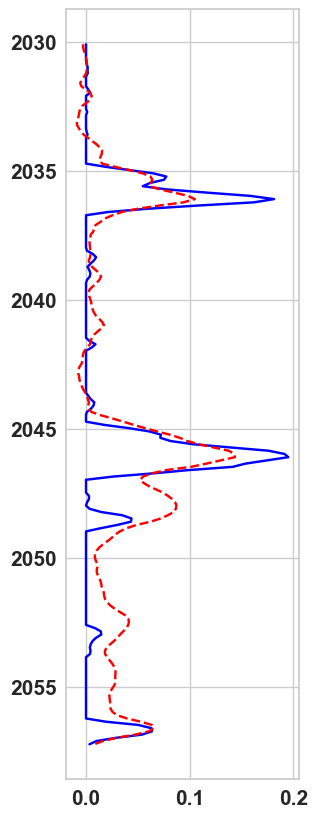

In [93]:

_1 = testing.copy()
_1 = _1[_1["Formation"]=="Sakessar"].sort_values(by="DEPTH") 
plt.figure(figsize=(3,10))

plt.plot(_1["PHIE"],_1["DEPTH"],color="blue")
plt.plot(_1["Predicted Effective Porosity"]*0.5,_1["DEPTH"],color="red",linestyle="--")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

# Water Saturation

In [94]:
features=training[["GR","well","VCL","RHOB","PHIE","Formation","SW"]]

In [95]:
reg = setup(data = features, target = "SW",verbose=False,remove_outliers=True)

In [96]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0018,0.0000,0.0051,0.9998,0.0043,0.0314,2.5650
gbr,Gradient Boosting Regressor,0.0016,0.0000,0.0045,0.9998,0.0038,0.0294,3.2920
dt,Decision Tree Regressor,0.0019,0.0000,0.0052,0.9997,0.0041,0.0306,2.0260
lightgbm,Light Gradient Boosting Machine,0.0031,0.0001,0.0073,0.9995,0.0061,0.0481,4.0490
ada,AdaBoost Regressor,0.0106,0.0003,0.0158,0.9978,0.0128,0.1054,2.7480
et,Extra Trees Regressor,0.0034,0.0003,0.0137,0.9975,0.0110,0.0414,3.1000
knn,K Neighbors Regressor,0.1735,0.0736,0.2703,0.3558,0.1761,0.9183,2.2380
ridge,Ridge Regression,0.1726,0.0960,0.2945,0.1671,0.1659,2.3392,3.3550
en,Elastic Net,0.2601,0.1109,0.3328,0.0298,0.2203,1.9171,1.9710
lasso,Lasso Regression,0.2706,0.1125,0.3352,0.0165,0.2218,1.9551,2.6390


Text(65.72222222222219, 0.5, 'Machine Learning Models')

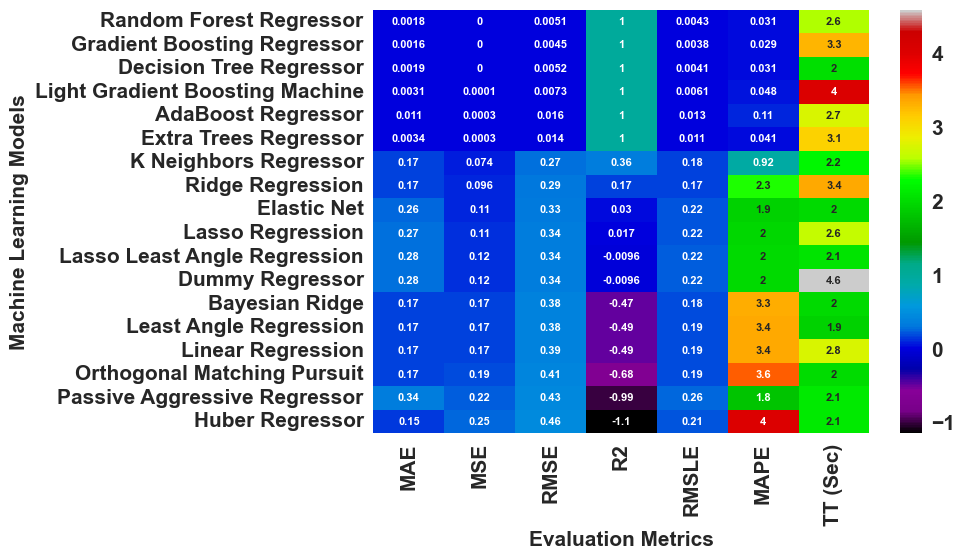

In [97]:
df = pull()
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [99]:
testing["Measured Effective Porosity"] = testing["PHIE"].copy()
testing["Effective Porosity"] = testing["Predicted Effective Porosity"]

In [101]:
final_lightgbm = finalize_model(c2)
test = testing[["GR","well","VCL","RHOB","PHIE","Formation"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Predicted Water Saturation"] = unseen_predictions["prediction_label"]

In [102]:
testing

,DEPTH,GR,DT,ILD,NPHI,RHOB,Formation,LLD,VCL,Density Porosity,...,GR_max,GR_min,Shale Porosity,Measured VCL,Density Porosity Predicted,Measured Density Porosity,Predicted Effective Porosity,Measured Effective Porosity,Effective Porosity,Predicted Water Saturation
0,2030.0905,12.6757,52.7483,38.0677,0.0190,2.7010,Sakessar,38.0677,0.017996,0.000454,...,67.2085,9.833,1.0,0.049546,0.000454,0.005263,-0.005707,0.000000,-0.005707,0.999317
1,2030.2155,13.7872,52.7113,37.8958,0.0190,2.7040,Sakessar,37.8958,0.014930,-0.000287,...,67.2085,9.833,1.0,0.068918,-0.000287,0.003509,-0.005586,0.000000,-0.005586,0.998861
2,2030.3405,14.8267,53.0225,39.9648,0.0190,2.7035,Sakessar,39.9648,0.013995,0.000859,...,67.2085,9.833,1.0,0.087035,0.000859,0.003801,-0.003935,0.000000,-0.003935,0.998633
3,2030.4655,15.1580,53.1048,43.0137,0.0188,2.6991,Sakessar,43.0137,0.016177,0.003583,...,67.2085,9.833,1.0,0.092810,0.003583,0.006374,-0.001436,0.000000,-0.001436,0.999089
4,2030.5905,14.9929,52.1703,45.9458,0.0180,2.6958,Sakessar,45.9458,0.018301,0.005281,...,67.2085,9.833,1.0,0.089932,0.005281,0.008304,-0.000126,0.000000,-0.000126,0.999317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2056.7156,35.5472,65.9348,6.9826,0.2165,2.4955,Sakessar,6.9826,0.111166,0.133865,...,67.2085,9.833,1.0,0.448174,0.133865,0.125439,0.121103,0.063559,0.121103,0.126721
214,2056.8406,29.9253,61.2952,7.7734,0.1956,2.5351,Sakessar,7.7734,0.094647,0.107142,...,67.2085,9.833,1.0,0.350190,0.107142,0.102281,0.095009,0.053930,0.095009,0.161530
215,2056.9656,25.0367,56.9303,9.0277,0.1385,2.5979,Sakessar,9.0277,0.063694,0.068127,...,67.2085,9.833,1.0,0.264986,0.068127,0.065556,0.059123,0.028969,0.059123,0.307023
216,2057.0906,21.5457,54.2637,11.4764,0.0876,2.6447,Sakessar,11.4764,0.040447,0.039178,...,67.2085,9.833,1.0,0.204141,0.039178,0.038187,0.032588,0.010001,0.032588,0.901829


In [103]:
r2_score(testing["SW"],testing["Predicted Water Saturation"])

0.9999006327633937

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


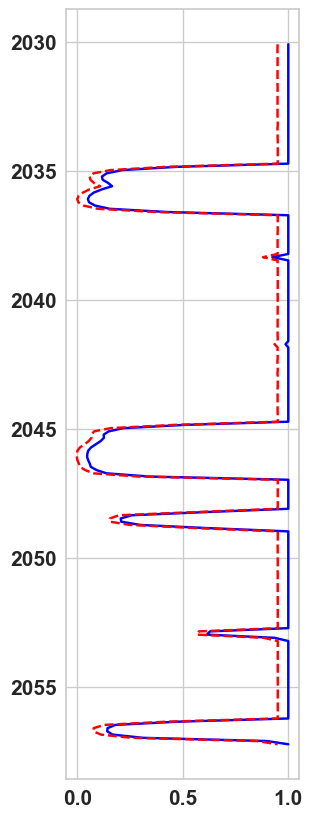

In [111]:

_1 = testing.copy()
_1 = _1[_1["Formation"]=="Sakessar"].sort_values(by="DEPTH") 
plt.figure(figsize=(3,10))

plt.plot(_1["SW"],_1["DEPTH"],color="blue")
plt.plot(_1["Predicted Water Saturation"]-0.05,_1["DEPTH"],color="red",linestyle="--")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [84]:
_1["Predicted Water Saturation"] = _1["Predicted Water Saturation"]-0.07

In [85]:
r2_score(_1["SW"],_1["Predicted Water Saturation"])

0.8407054445177027

<AxesSubplot:xlabel='SW', ylabel='Predicted Water Saturation'>

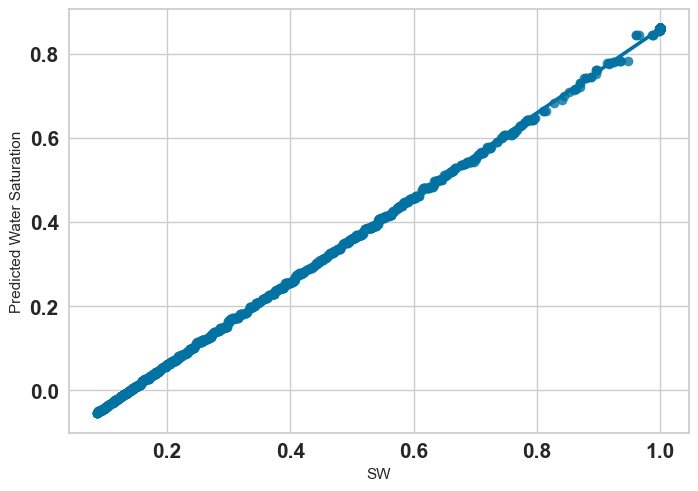

In [86]:
sns.regplot(data =_1,x= "SW",y = "Predicted Water Saturation")

In [120]:
bb = training.copy()
unseen_predictions = predict_model(final_lightgbm, data=training)
bb["Predicted Water Saturation"] = unseen_predictions["prediction_label"]
bb

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0008,0.0000,0.0036,0.9999,0.0034,0.0243


,DEPT,BS,C1,C2,CALI,DRHO,DT,GR,LLD,LLS,...,DEPTH,VCL,Density Porosity,Clay Effect,SW,well,GR_max,GR_min,Shale Porosity,Predicted Water Saturation
0,2054.3601,8.5,10.7658,10.3231,9.8241,0.0020,53.1402,21.3519,1530.5306,1530.2029,...,2054.3601,0.057675,0.015146,0.004496,0.844242,1,80.4909,17.7323,1.0,0.840173
1,2054.4851,8.5,10.7609,10.3247,9.8257,0.0020,52.9211,22.1486,1309.2728,1317.4973,...,2054.4851,0.070370,0.013743,0.005486,1.000000,1,80.4909,17.7323,1.0,1.000000
2,2054.6101,8.5,10.7160,10.3263,9.8273,0.0013,52.7547,22.3980,1136.4844,1127.5483,...,2054.6101,0.074344,0.011871,0.005795,1.000000,1,80.4909,17.7323,1.0,1.000000
3,2054.7351,8.5,10.6750,10.3280,9.8334,0.0010,52.7354,22.4607,988.7964,973.8954,...,2054.7351,0.075343,0.011696,0.005873,1.000000,1,80.4909,17.7323,1.0,1.000000
4,2054.8601,8.5,10.6559,10.3296,9.8421,0.0007,52.8077,22.5075,879.7823,871.9509,...,2054.8601,0.076088,0.013918,0.005931,1.000000,1,80.4909,17.7323,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2175.7351,8.5,8.5444,8.5706,8.6897,0.1247,55.4220,80.2940,38.4640,39.5898,...,2175.7351,0.996863,0.023509,0.077709,1.000000,1,80.4909,17.7323,1.0,1.000000
972,2175.8601,8.5,8.5307,8.5576,8.4866,0.1475,55.4220,80.2940,38.4640,39.7774,...,2175.8601,0.996863,0.033918,0.077709,1.000000,1,80.4909,17.7323,1.0,1.000000
973,2175.9851,8.5,8.4850,8.5150,8.3130,0.1579,55.3868,80.2940,38.4634,39.8870,...,2175.9851,0.996863,0.040058,0.077709,1.000000,1,80.4909,17.7323,1.0,1.000000
974,2176.1101,8.5,8.4211,8.4331,8.2491,0.1661,55.0648,80.2940,38.4576,39.8870,...,2176.1101,0.996863,0.037135,0.077709,1.000000,1,80.4909,17.7323,1.0,1.000000


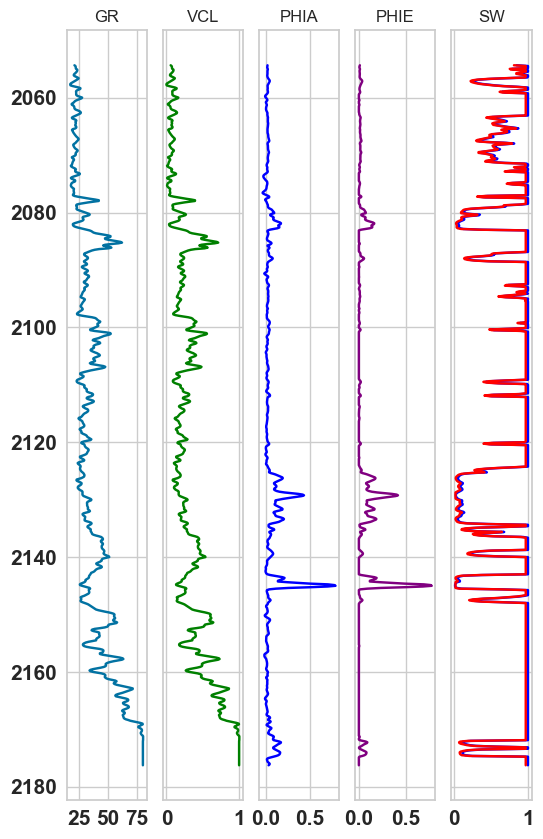

In [124]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(6,10),sharey=True)
ax[0].plot(bb["GR"],bb["DEPTH"])
ax[1].plot(FFF[["VCL"]],bb["DEPTH"],color="green")



ax[2].plot(FFF[["PHIA"]],bb["DEPTH"],color="blue")

ax[3].plot(FFF[["PHIE"]],bb["DEPTH"],color="purple")
ax[4].plot(FFF[["SW"]],bb["DEPTH"],color="blue")
ax[4].plot(bb[["Predicted Water Saturation"]]-0.03,bb["DEPTH"],color="red")

ax[0].set_title("GR")
ax[1].set_title("VCL")
ax[2].set_title("PHIA")
ax[3].set_title("PHIE")
ax[4].set_title("SW")
plt.gca().invert_yaxis()

In [88]:
bb = training.copy()
unseen_predictions = predict_model(final_lightgbm, data=training)
bb["Predicted Water Saturation"] = unseen_predictions["Label"]
bb

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0003,0.0000,0.0009,1.0000,0.0005,0.0009


,DEPT,BS,C1,C2,CALI,DRHO,DT,GR,LLD,LLS,...,Density Porosity,PHIA,Clay Effect,PHIE,SW,well,GR_max,GR_min,Shale Porosity,Predicted Water Saturation
0,2021.1101,12.25,12.1902,12.3243,9.0034,-0.0235,54.3814,392.194888,27.6086,33.5519,...,0.154094,0.154094,0.052761,0.101332,0.088817,1,160.9806,13.109,1.0,0.089989
1,2021.2351,12.25,12.2409,12.3280,9.0707,0.0286,54.3675,405.185777,64.7151,66.8517,...,0.148129,0.148129,0.057785,0.090344,0.099620,1,160.9806,13.109,1.0,0.099423
2,2021.3601,12.25,12.2727,12.2887,9.2183,0.0814,54.2578,410.764983,78.8969,78.8969,...,0.139532,0.139532,0.059943,0.079590,0.113080,1,160.9806,13.109,1.0,0.113421
3,2021.4851,12.25,12.2980,12.2556,9.6574,0.1260,54.1340,415.072471,72.3834,73.1072,...,0.136140,0.136140,0.061608,0.074532,0.120753,1,160.9806,13.109,1.0,0.120686
4,2021.6101,12.25,12.3216,12.2835,10.4844,0.1467,54.0102,423.835980,60.1979,64.1179,...,0.141754,0.141754,0.064997,0.076757,0.117253,1,160.9806,13.109,1.0,0.117329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2178.4851,8.50,8.2472,8.4527,8.1467,0.1441,49.5858,1377.025737,38.8683,39.8870,...,0.060877,0.060877,0.085579,0.000000,1.000000,1,160.9806,13.109,1.0,1.000000
1227,2178.6101,8.50,8.1105,8.4024,8.1031,0.1311,49.5858,1377.025737,38.8683,39.8870,...,0.089064,0.089064,0.085579,0.003485,1.000000,1,160.9806,13.109,1.0,1.000000
1228,2178.7351,8.50,7.9500,8.3154,8.0320,0.1278,49.5858,1377.025737,38.8683,39.8870,...,0.112105,0.112105,0.085579,0.026526,0.339292,1,160.9806,13.109,1.0,0.337383
1229,2178.8601,8.50,8.0058,8.2194,7.9705,0.1327,49.5858,1377.025737,38.8683,39.8870,...,0.125556,0.125556,0.085579,0.039976,0.225134,1,160.9806,13.109,1.0,0.225100


In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(6,10),sharey=True)
ax[0].plot(bb["GR"],bb["DEPTH"])
ax[1].plot(FFF[["VCL"]],bb["DEPTH"],color="green")



ax[2].plot(FFF[["PHIA"]],bb["DEPTH"],color="blue")

ax[3].plot(FFF[["PHIE"]],bb["DEPTH"],color="blue")
ax[3].plot(bb[["Predicted Effective Porosity"]]-0.01,bb["DEPTH"],color="red")

ax[0].set_title("GR")
ax[1].set_title("VCL")
ax[2].set_title("PHIA")
ax[3].set_title("PHIE")

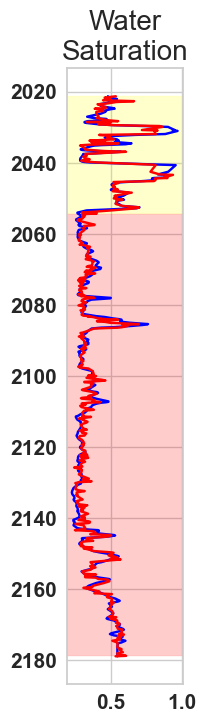

In [141]:
r = testing[testing["well"]==0]
r = r.sort_values(by="DEPTH")
forms = ["Chorgali","Sakessar"]
min1 = r[r["Formation"]=="Chorgali"]["DEPTH"].min()
min2 = r[r["Formation"]=="Chorgali"]["DEPTH"].max()

plt.figure(figsize=(1.5,8))

plt.plot(r["SW"],r["DEPTH"],color="blue")
plt.plot(r["Predicted Water Saturation"],r["DEPTH"],color="red")
plt.gca().invert_yaxis()
plt.axhspan(min1, min2,color="yellow",alpha=0.2)
plt.axhspan(min3, min4,color="red",alpha=0.2)
plt.title("Water\nSaturation",fontsize=20)
plt.show()

In [147]:
_1

,DEPT,BS,C1,C2,CALI,DRHO,DT,GR,LLD,LLS,...,Shale Porosity,Predicted Volume of Clay,Measured VCL,Density Porosity Predicted,Measured Density Porosity,Density Porosity,Predicted Effective Porosity,Measured Effective Porosity,Effective Porosity,Predicted Water Saturation
30,2024.8601,12.25,13.3552,12.2937,12.7993,0.1413,54.8946,18.1998,54.6895,49.4578,...,0.731275,0.070540,0.070703,0.076120,0.064870,0.076120,0.032366,0.038190,0.032366,0.425839
1167,2169.9851,8.50,8.6882,8.4848,8.3047,0.1203,55.4220,79.2595,34.6015,34.4920,...,0.999990,0.979974,0.980379,0.073556,0.068642,0.073556,-0.018656,-0.018442,-0.018656,0.558191
993,2148.2351,8.50,8.9640,8.7550,8.2990,0.0060,52.1250,33.3180,463.3630,310.7070,...,0.999990,0.248303,0.248344,0.014278,0.018602,0.014278,-0.004861,-0.003457,-0.004861,0.370072
417,2076.2351,8.50,10.4254,9.7187,9.7381,0.0057,51.7141,20.6747,1079.6830,1004.9980,...,0.999990,0.046887,0.046884,-0.018694,-0.006586,-0.018694,-0.009418,-0.010751,-0.009418,0.293276
158,2043.3601,8.50,12.9405,11.0782,12.8485,0.0346,79.8131,64.9771,9.3185,7.6774,...,0.731275,0.728827,0.720365,0.254450,0.312384,0.254450,0.069472,0.040550,0.069472,0.937844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2106.7351,8.50,9.5120,9.4474,9.0147,-0.0070,56.5191,46.4050,93.9867,88.3883,...,0.999990,0.456812,0.456873,0.030054,0.028057,0.030054,-0.011792,-0.012525,-0.011792,0.383146
394,2073.3601,8.50,10.0980,9.6973,9.5004,0.0057,51.8860,25.7728,354.2541,325.5007,...,0.999990,0.128102,0.128118,-0.013500,-0.003834,-0.013500,-0.013976,-0.015214,-0.013976,0.277770
84,2032.3601,8.50,11.6606,9.9310,10.8962,-0.0050,53.1267,31.5979,39.2124,34.4075,...,0.731275,0.250907,0.256781,0.029088,0.016160,0.029088,-0.081812,-0.080738,-0.081812,0.493258
143,2039.7351,8.50,11.9429,10.3450,11.2952,0.0034,57.7678,13.9898,594.9855,644.4803,...,0.731275,0.011885,0.012233,0.021238,0.012744,0.021238,0.000590,0.008127,0.000590,0.367729


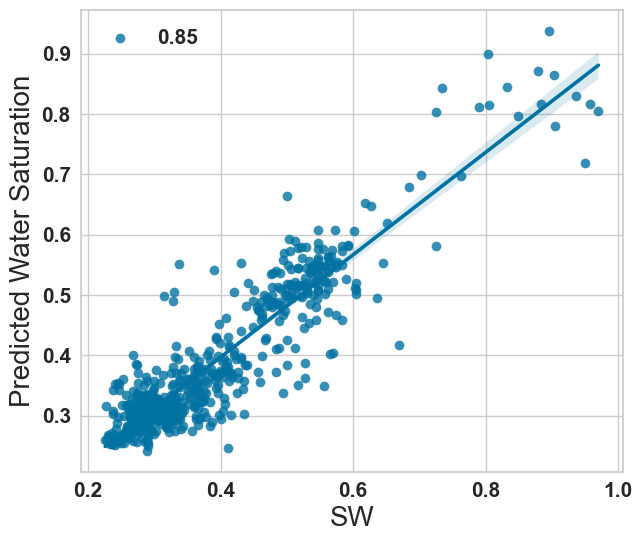

In [148]:
    _1 = testing
    plt.figure(figsize=(7,6))
    score = r2_score(testing["SW"],testing["Predicted Water Saturation"])
    sns.regplot(data=_1,x="SW",y="Predicted Water Saturation",label=f"{round(score,2)}")
    plt.xlabel("SW",fontsize=20)
    plt.ylabel("Predicted Water Saturation",fontsize=20)
    plt.legend(fontsize=15)
    plt.show()

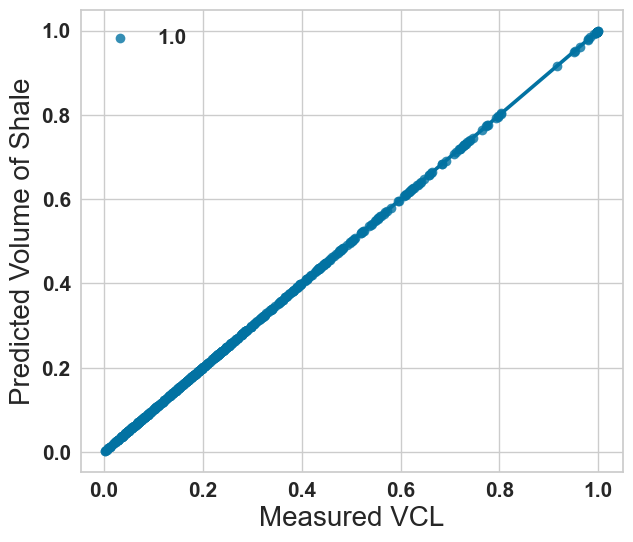

In [158]:
    _1 = testing
    plt.figure(figsize=(7,6))
    score = r2_score(_1["Predicted Volume of Clay"],_1["Measured VCL"])
    sns.regplot(data=_1,x="Predicted Volume of Clay",y="VCL",label=f"{round(score,2)}")
    plt.xlabel("Measured VCL",fontsize=20)
    plt.ylabel("Predicted Volume of Shale",fontsize=20)
    plt.legend(fontsize=15)
    plt.show()